# GST HACKTHON

# Overview

This Jupyter Notebook is designed for model evaluation and prediction using XGBoost. The primary steps involve loading test data, making predictions, and saving the results to a CSV file.

To make predictions on validation data instead of the test data, follow these simple instructions:

1. **Replace the `X_test` Path**: Locate the section of the code where the test data is loaded and replace the path for `X_test` with the path for your validation dataset (`X_val`).



2. **Run All Cells**: After updating the path, execute all subsequent cells in the notebook.

Once you run all the cells, the predicted labels for the validation data will be saved as a CSV file named `final_predictions.csv`.

## Loading the training and test data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
dir = "/content/drive/MyDrive/Gst_data"

X_train_ = os.path.join(dir, 'Train_60/Train_60/Train_60/X_Train_Data_Input.csv')
Y_train_ = os.path.join(dir, 'Train_60/Train_60/Train_60/Y_Train_Data_Target.csv')

X_train = pd.read_csv(X_train_)
y_train = pd.read_csv(Y_train_)

### Instructions for Making Predictions on Validation Data

To make predictions on validation data, simply replace the path for the test dataset (`X_test`) with the path to your validation dataset (`X_val`). Once the paths are updated, you can re-run all the following cells to evaluate the model on the validation data in the same way as done for the test data.


After updating, run the cells below to make predictions and calculate the evaluation metrics.

In [18]:
dir = "/content/drive/MyDrive/Gst_data"
X_test_ = os.path.join(dir, 'Test_20/Test_20/Test_20/X_Test_Data_Input.csv')    # replace this with valdation data
y_test_= os.path.join(dir, 'Test_20/Test_20/Test_20/Y_Test_Data_Target.csv')

X_test = pd.read_csv(X_test_)
y_test = pd.read_csv(y_test_)


In [19]:

X_train = X_train.drop(columns=['ID'],axis=1)
y_train = y_train.drop(columns=['ID'], axis = 1)
X_test = X_test.drop(columns=['ID'], axis = 1)
y_test = y_test.drop(columns=['ID'], axis = 1)

## Exploring the Data

In [9]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785133 entries, 0 to 785132
Data columns (total 22 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Column0   785124 non-null  float64
 1   Column1   785133 non-null  int64  
 2   Column2   785133 non-null  float64
 3   Column3   658830 non-null  float64
 4   Column4   657423 non-null  float64
 5   Column5   617953 non-null  float64
 6   Column6   781283 non-null  float64
 7   Column7   785133 non-null  float64
 8   Column8   781283 non-null  float64
 9   Column9   52996 non-null   float64
 10  Column10  785133 non-null  int64  
 11  Column11  785133 non-null  int64  
 12  Column12  785133 non-null  int64  
 13  Column13  785133 non-null  int64  
 14  Column14  419430 non-null  float64
 15  Column15  768677 non-null  float64
 16  Column16  785133 non-null  float64
 17  Column17  785133 non-null  int64  
 18  Column18  785133 non-null  float64
 19  Column19  785133 non-null  int64  
 20  Colu

In [10]:
print(X_train.isnull().sum())

Column0          9
Column1          0
Column2          0
Column3     126303
Column4     127710
Column5     167180
Column6       3850
Column7          0
Column8       3850
Column9     732137
Column10         0
Column11         0
Column12         0
Column13         0
Column14    365703
Column15     16456
Column16         0
Column17         0
Column18         0
Column19         0
Column20         0
Column21         0
dtype: int64
Column0          2
Column1          0
Column2          0
Column3      42234
Column4      42710
Column5      55659
Column6       1234
Column7          0
Column8       1234
Column9     243853
Column10         0
Column11         0
Column12         0
Column13         0
Column14    121679
Column15      5485
Column16         0
Column17         0
Column18         0
Column19         0
Column20         0
Column21         0
dtype: int64


### Observations

After examining the dataset for missing values in each column, we observe the following:

- **Column3, Column4, Column5, Column9, and Column14** have significant missing values:
  - `Column3` has 126,303 missing values.
  - `Column4` has 127,710 missing values.
  - `Column5` has 167,180 missing values.
  - `Column9` has the highest number of missing values with 732,137 missing entries.
  - `Column14` has 365,703 missing values.

- **Column6, Column8, and Column15** have smaller amounts of missing data:
  - `Column6` and `Column8` both have 3,850 missing values.
  - `Column15` has 16,456 missing values.

- **Column0, Column1, Column2, Column7, Column10, Column11, Column12, Column13, Column16, Column17, Column18, Column19, Column20, and Column21** have no missing values.

### Implications

- We will impute the missing value with median as it is roboust to outliers.


In [ ]:
for column in X_train.columns:
  if X_train[column].isnull().any():
    median_value = X_train[column].median()
    X_train[column].fillna(median_value, inplace=True)

for column in X_test.columns:
  if X_test[column].isnull().any():
    median_value = X_test[column].median()
    X_test[column].fillna(median_value, inplace=True)


In [12]:
print(X_train.isnull().sum())

Column0     0
Column1     0
Column2     0
Column3     0
Column4     0
Column5     0
Column6     0
Column7     0
Column8     0
Column9     0
Column10    0
Column11    0
Column12    0
Column13    0
Column14    0
Column15    0
Column16    0
Column17    0
Column18    0
Column19    0
Column20    0
Column21    0
dtype: int64


## Now we will Scale the data Using Min-Max Scaler

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Converting the scaled data back to pandas DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)


## plotting the correlation matrix to understand how other features are related

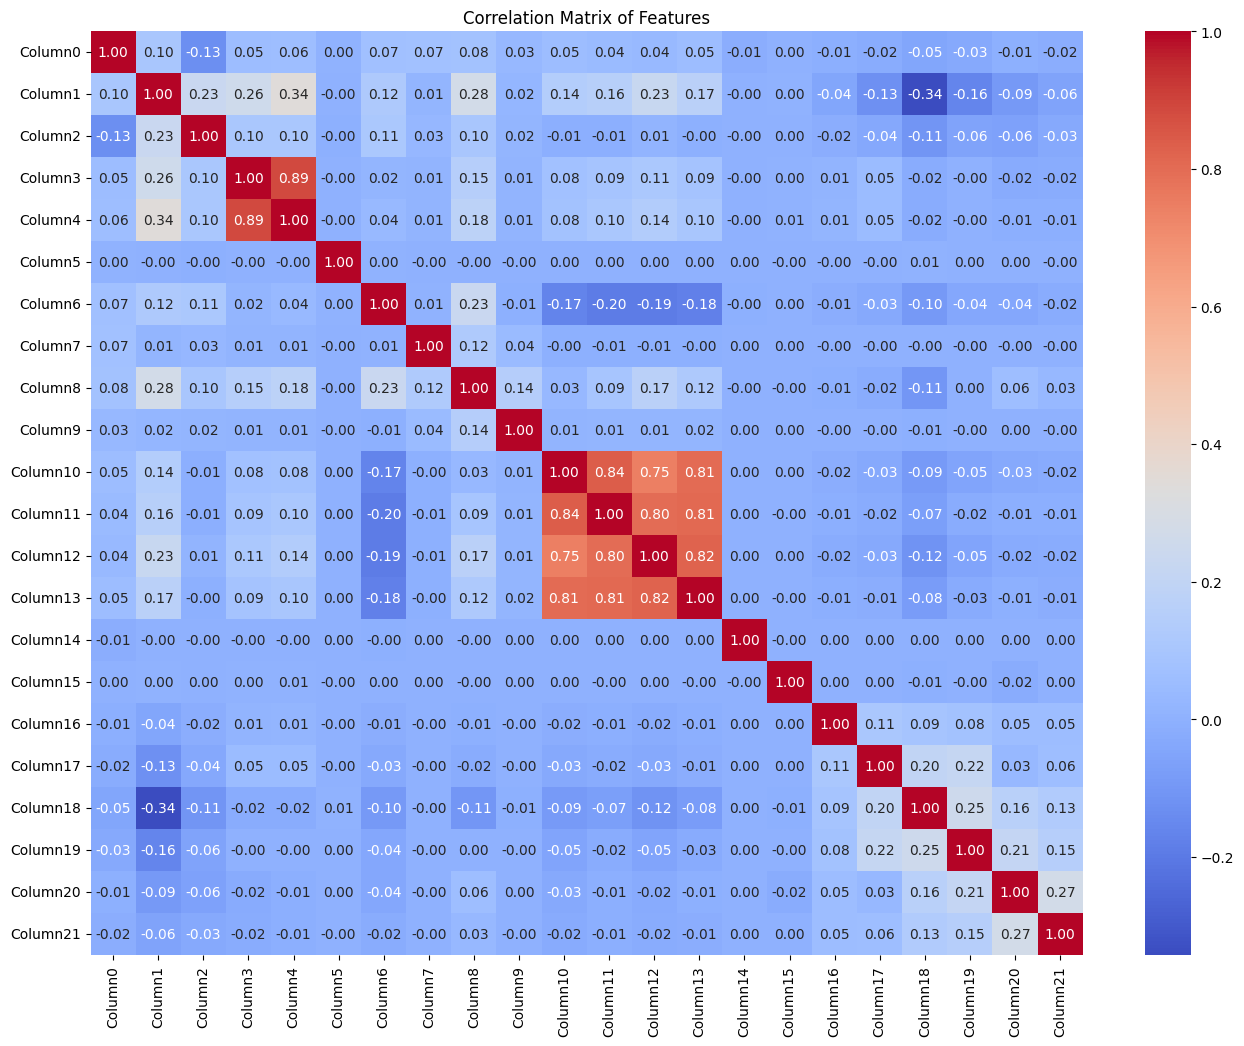

In [15]:
correlation_matrix = X_train.corr()

# Creating a heatmap of the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

## Model Training

We initially tried **Random Forest**, **Logistic Regression**, and **SVM** for the classification task. Out of these, **Random Forest** performed the best, achieving high accuracy and recall. Given these promising results, we decided to explore more advanced boosting methods and implemented **XGBoost** to further improve the model’s performance.


In [20]:
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

model = RandomForestClassifier()
model.fit(X_train_scaled , y_train)
y_pred = model.predict(X_test_scaled)

y_pred_proba = model.predict_proba(X_test_scaled )[:, 1]  # Use predict_proba for ROC-AUC

#Calculating evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)

#Printing the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC Score:", roc_auc)
print("Confusion Matrix:")
print(conf_matrix)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.9759468423305007
Precision: 0.8403881050253675
Recall: 0.9195639841154064
F1 Score: 0.8781950813645247
ROC-AUC Score: 0.9935175739631997
Confusion Matrix:
[[232724   4310]
 [  1985  22693]]


Correlation matrix
imputation median
Robust scaling
train on random forest
hyperparameter tuning using gridsearch cv
train logistic regression
try XGBoost

### Hyperparameter Tuning with XGBoost

In this section, we performed hyperparameter tuning for the **XGBoost** classifier to improve the model's performance. The steps involved are as follows:

1. **Parameter Grid Definition**: We defined a grid of hyperparameters to explore:
   - `n_estimators`: The number of boosting rounds (200, 300, 350).
   - `learning_rate`: The step size shrinkage to prevent overfitting (0.01, 0.05, 0.1).
   - `max_depth`: The maximum depth of each tree (4, 5, 7).

2. **Model Initialization**: We initialized the **XGBoost classifier** and set it to use **GridSearchCV** for tuning the hyperparameters. We used **5-fold cross-validation** with the **F1 score** as the evaluation metric to balance precision and recall, especially important for imbalanced datasets.

3. **GridSearchCV**: We used **GridSearchCV** to test different combinations of hyperparameters, selecting the best-performing set based on cross-validated F1 scores.

4. **Best Model Selection**: Once the grid search was complete, the best model and its corresponding hyperparameters were extracted.

5. **Evaluation**: Using the best model, we made predictions on the test set and evaluated the model’s performance by calculating both the **accuracy** and **F1 score**. These metrics provide insight into how well the optimized model performs on unseen data.

### Results:
- **Best Parameters**: The optimal hyperparameters found by the grid search.
- **Best F1 Score**: The highest F1 score achieved during cross-validation.
- **Test Set Performance**: We evaluated the model on the test data, reporting both the **accuracy** and **F1 score** to assess its overall effectiveness.

This approach ensures that we selected the best model based on its generalization capability and provides an improved baseline for further model enhancements.


In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score

'''
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [200, 300, 350],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [4, 5, 7],
}

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Hyperparameter tuning using GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=4, scoring='f1', n_jobs=-1, verbose=1)

# Fitting the model to the training data
grid_search.fit(X_train_scaled, y_train)

#best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_f1_score = grid_search.best_score_


'''

In [22]:
# best parameters and score
#print(f"Best Parameters: {best_params}")
#print(f"Best F1 Score from Grid Search: {best_f1_score:.4f}")


Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Best F1 Score from Grid Search: 0.8892


In [ ]:
# best parameters
best_params = {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}


### Model Evaluation Summary

In this section, we trained the final XGBoost model with the optimized hyperparameters and evaluated its performance on the test set. Below are the key evaluation metrics:

- **Test Accuracy**: 0.9783 – The model correctly predicted 97.83% of the test samples.
- **F1 Score**: 0.8910 – This balanced metric considers both precision and recall, indicating strong overall model performance.
- **Precision**: 0.8465 – 84.65% of the positive predictions made by the model were correct.
- **Recall**: 0.9404 – The model correctly identified 94.04% of the actual positive instances.
- **Balanced Accuracy**: 0.9613 – A more balanced metric, especially useful for imbalanced datasets, showing that the model performs well across both classes.
- **ROC-AUC Score**: 0.9948 – The high ROC-AUC score indicates excellent discriminative ability between the classes.

Additionally, we saved the predicted labels (`y_pred`) into a CSV file named `'final_predictions.csv'`.

This demonstrates that the XGBoost model has strong predictive power and generalizes well on unseen data.

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:13:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test Accuracy: 0.9783
Test F1 Score: 0.8910
Test Precision: 0.8465
Test Recall: 0.9404
Balanced Accuracy: 0.9613
ROC-AUC Score: 0.9948
Predictions saved to 'final_predictions.csv'


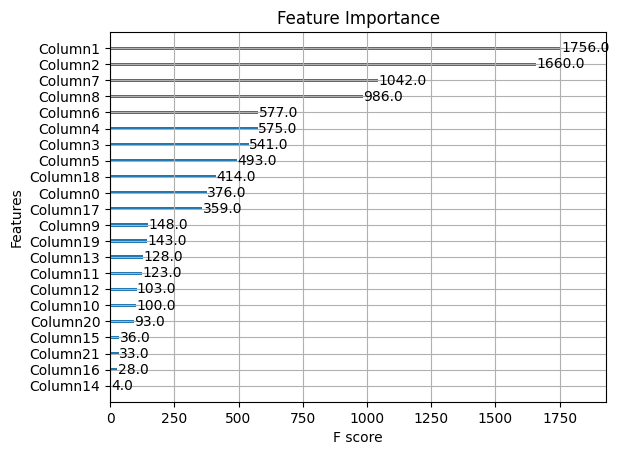

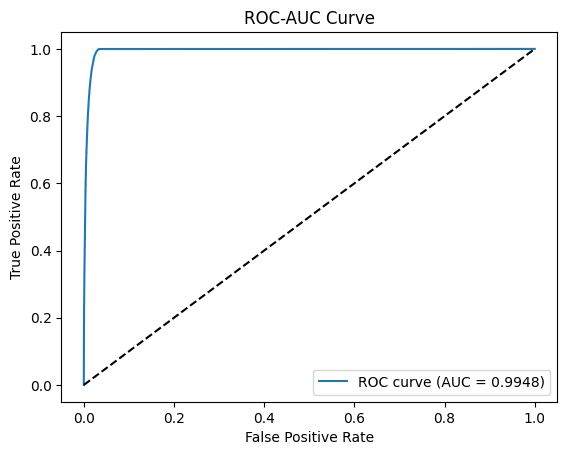

In [27]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score, balanced_accuracy_score, roc_curve
import matplotlib.pyplot as plt
import pandas as pd
import joblib

# Initialize the XGBoost classifier with the best hyperparameters
final_model = xgb.XGBClassifier(learning_rate=0.1, max_depth=7, n_estimators=200, use_label_encoder=False, eval_metric='logloss')

# Train the final model
final_model.fit(X_train_scaled, y_train)

# Save the trained model to a file
joblib.dump(final_model, 'final_xgboost_model.joblib')
print("Final model saved as 'final_xgboost_model.joblib'")

# predictions on the test data
y_pred = final_model.predict(X_test_scaled)
y_pred_proba = final_model.predict_proba(X_test_scaled)[:, 1]  # For ROC-AUC curve

# Evaluate the model's performance
test_accuracy = accuracy_score(y_test, y_pred)
test_f1_score = f1_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
balanced_acc = balanced_accuracy_score(y_test, y_pred)

# Print evaluation metrics
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test F1 Score: {test_f1_score:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Balanced Accuracy: {balanced_acc:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Saving only the predictions to a CSV file
pd.DataFrame({'Predicted': y_pred}).to_csv('final_predictions.csv', index=False)
print("Predictions saved to 'final_predictions.csv'")

# Ploting Feature Importance
xgb.plot_importance(final_model, importance_type='weight')
plt.title("Feature Importance")
plt.show()

# Plotting ROC-AUC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc='lower right')
plt.show()
